In [41]:
pip install natsort

Note: you may need to restart the kernel to use updated packages.


In [42]:
import re
import os
from collections import defaultdict
from tqdm import tqdm
from natsort import natsorted

def initialize_temp():
    return {
        "total_LOC": [],
        "issues_by_severity": {"Undefined": [], "Low": [], "Medium": [], "High": []},
        "issues_by_confidence": {"Undefined": [], "Low": [], "Medium": [], "High": []}
    }

# Regex patterns
regex_patterns = {
    "loc": r"Total lines of code:\s+(\d+)",
    "category": r"\s*(Undefined|Low|Medium|High):\s+(\d+)"
}

def parse_report(content, temp_data):
    # Extract total LOC
    loc_match = re.search(regex_patterns["loc"], content)
    if loc_match:
        temp_data["total_LOC"].append(int(loc_match.group(1)))

    # Split into severity and confidence sections
    if "Total issues (by severity):" in content:
        split_parts = content.split("Total issues (by severity):")[1]
        severity_part, confidence_part = split_parts.split("Total issues (by confidence):")

        # Extract severity
        for line in severity_part.strip().splitlines():
            match = re.match(regex_patterns["category"], line)
            if match:
                category, count = match.groups()
                temp_data["issues_by_severity"][category].append(int(count))

        # Extract confidence
        for line in confidence_part.strip().splitlines():
            match = re.match(regex_patterns["category"], line)
            if match:
                category, count = match.groups()
                temp_data["issues_by_confidence"][category].append(int(count))

def process_reports(directory_path, directories):
    all_data = []

    for folder in directories:
        folder_data = []
        folder_path = os.path.join(directory_path, folder)
        files = natsorted(os.listdir(folder_path))

        for file in tqdm(files, desc=f"Processing {folder}"):
            temp_result = initialize_temp()
            file_path = os.path.join(folder_path, file)

            with open(file_path, 'r') as report_file:
                content = report_file.read()
                parse_report(content, temp_result)

            folder_data.append(temp_result)

        all_data.append({folder: folder_data})

    return all_data

# Example usage:
dir_path = "reports"
dir_names = natsorted(os.listdir(dir_path))
data = process_reports(dir_path, dir_names)

Processing markitdown: 100%|██████████| 100/100 [00:00<00:00, 4351.25it/s]


In [43]:
data

[{'ha_xiaomi_home': [{'total_LOC': [16736],
    'issues_by_severity': {'Undefined': [0],
     'Low': [177],
     'Medium': [6],
     'High': [2]},
    'issues_by_confidence': {'Undefined': [0],
     'Low': [0],
     'Medium': [2],
     'High': [183]}},
   {'total_LOC': [16736],
    'issues_by_severity': {'Undefined': [0],
     'Low': [177],
     'Medium': [6],
     'High': [2]},
    'issues_by_confidence': {'Undefined': [0],
     'Low': [0],
     'Medium': [2],
     'High': [183]}},
   {'total_LOC': [16722],
    'issues_by_severity': {'Undefined': [0],
     'Low': [177],
     'Medium': [6],
     'High': [2]},
    'issues_by_confidence': {'Undefined': [0],
     'Low': [0],
     'Medium': [2],
     'High': [183]}},
   {'total_LOC': [16722],
    'issues_by_severity': {'Undefined': [0],
     'Low': [177],
     'Medium': [6],
     'High': [2]},
    'issues_by_confidence': {'Undefined': [0],
     'Low': [0],
     'Medium': [2],
     'High': [183]}},
   {'total_LOC': [16717],
    'issues_by_s

In [44]:
from matplotlib import pyplot as plt    

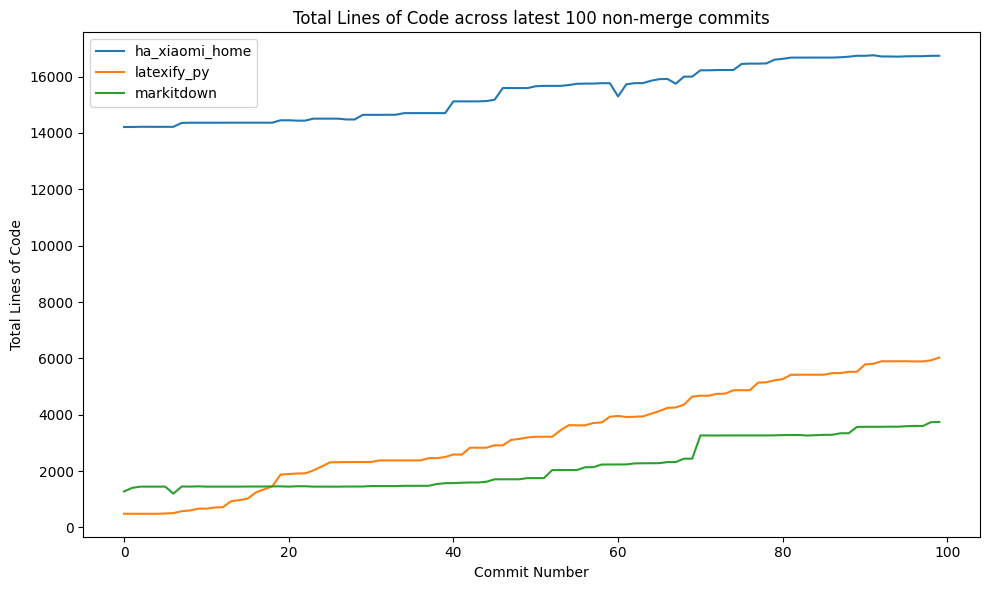

In [45]:
plt.figure(figsize=(10, 6))
for i, dir_name in enumerate(dir_names):
    x = range(len(data[i][dir_name]))
    y = [d["total_LOC"][0] for d in data[i][dir_name]][::-1]
    plt.plot(x, y, label=dir_name)
    plt.title("Total Lines of Code across latest 100 non-merge commits")
    plt.xlabel("Commit Number")
    plt.ylabel("Total Lines of Code")
    plt.legend()
plt.tight_layout()
plt.show()

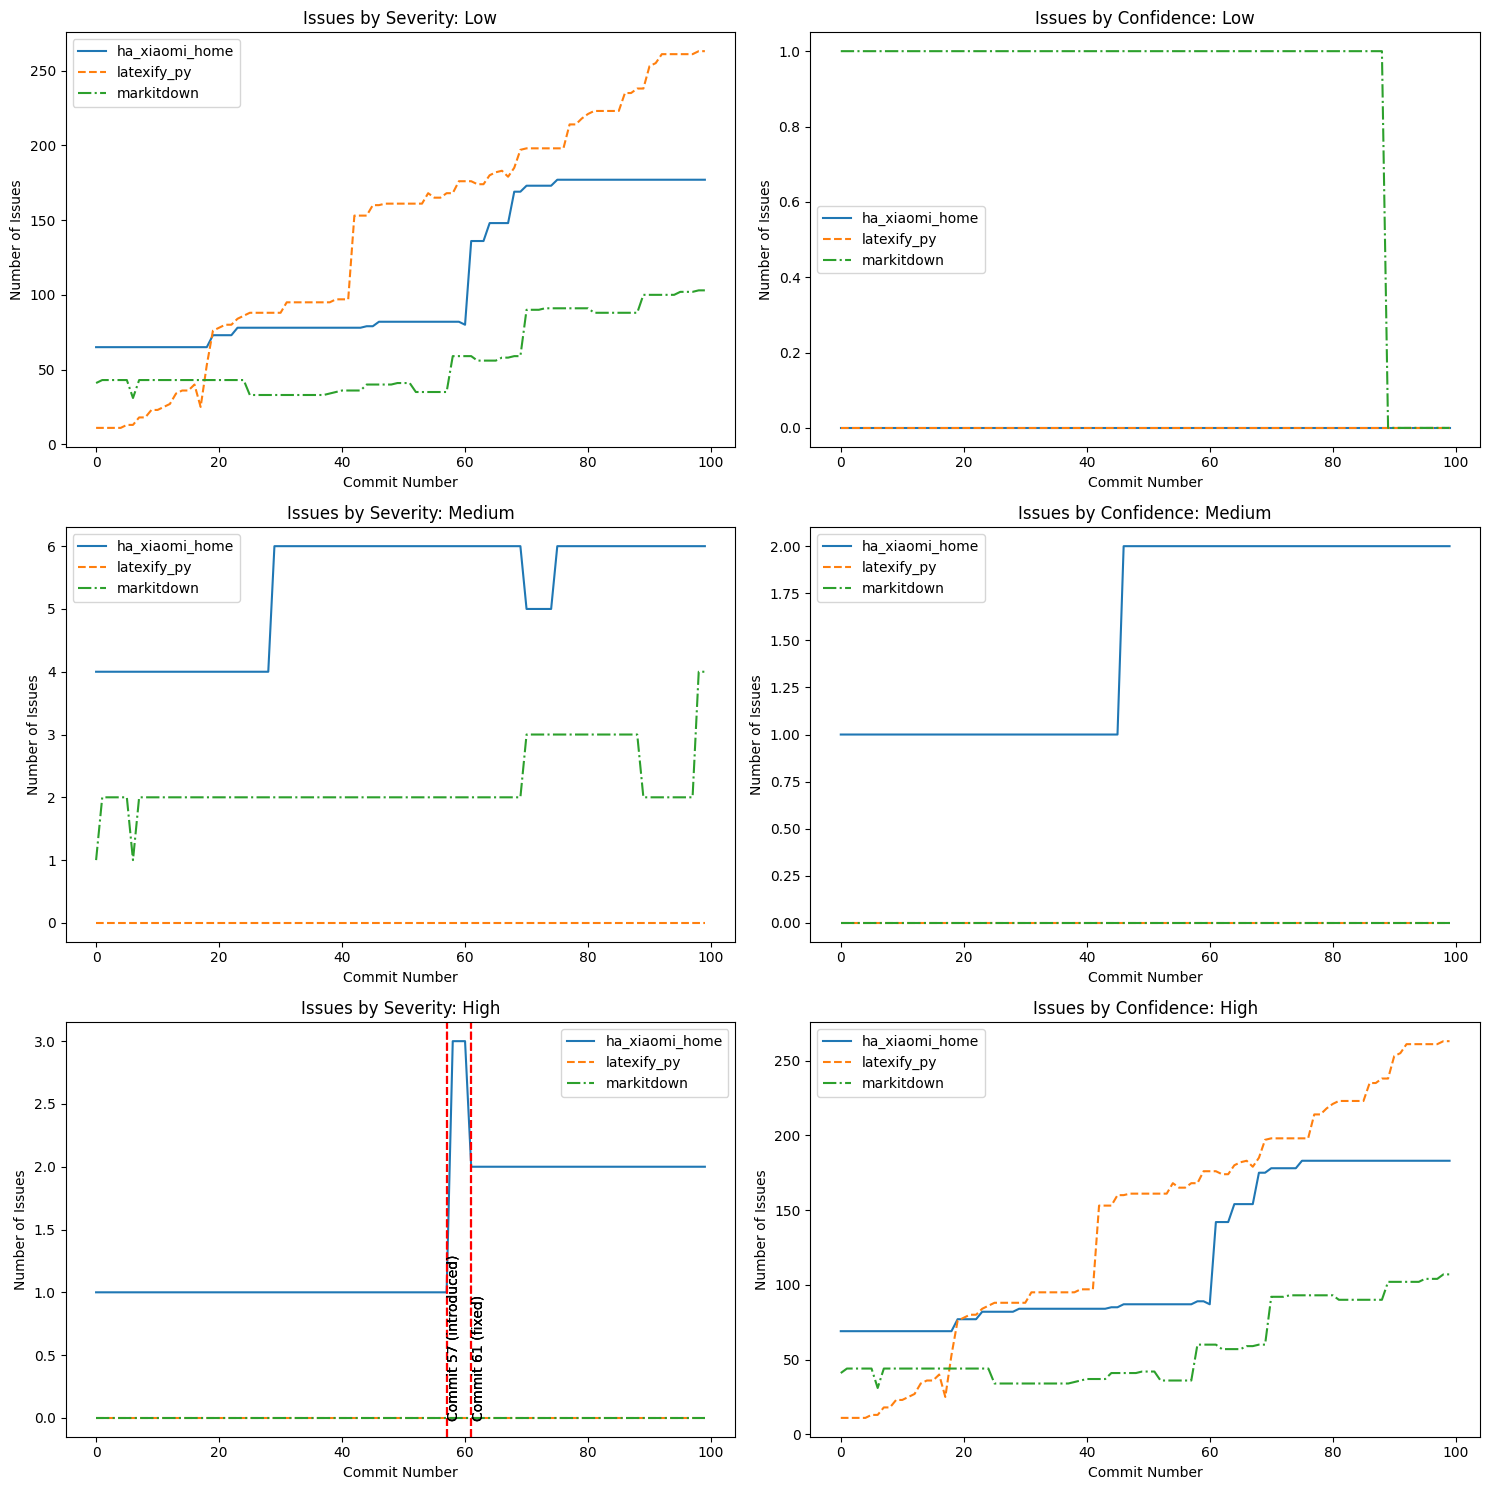

In [46]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i, dir_name in enumerate(dir_names):
    x = range(len(data[i][dir_name]))
    for j, category in enumerate(["Low", "Medium", "High"]):
        y = [d["issues_by_severity"][category][0] for d in data[i][dir_name]][::-1]
        axs[j, 0].plot(x, y, label=dir_name, linestyle="-" if i == 0 else "--" if i == 1 else "-.")
        axs[j, 0].set_title(f"Issues by Severity: {category}")
        axs[j, 0].set_xlabel("Commit Number")
        axs[j, 0].set_ylabel("Number of Issues")
        axs[j, 0].legend()
        if j==2:
            axs[j, 0].axvline(x=57, color='r', linestyle='--')
            axs[j, 0].text(57, 0, 'Commit 57 (introduced)', rotation=90)
            axs[j, 0].axvline(x=61, color='r', linestyle='--')

            axs[j, 0].text(61, 0, 'Commit 61 (fixed)', rotation=90)
            
    for j, category in enumerate(["Low", "Medium", "High"]):
        y = [d["issues_by_confidence"][category][0] for d in data[i][dir_name]][::-1]
        axs[j, 1].plot(x, y, label=dir_name, linestyle="-" if i == 0 else "--" if i == 1 else "-.")
        axs[j, 1].set_title(f"Issues by Confidence: {category}")
        axs[j, 1].set_xlabel("Commit Number")
        axs[j, 1].set_ylabel("Number of Issues")
        axs[j, 1].legend()
plt.tight_layout()
plt.show()

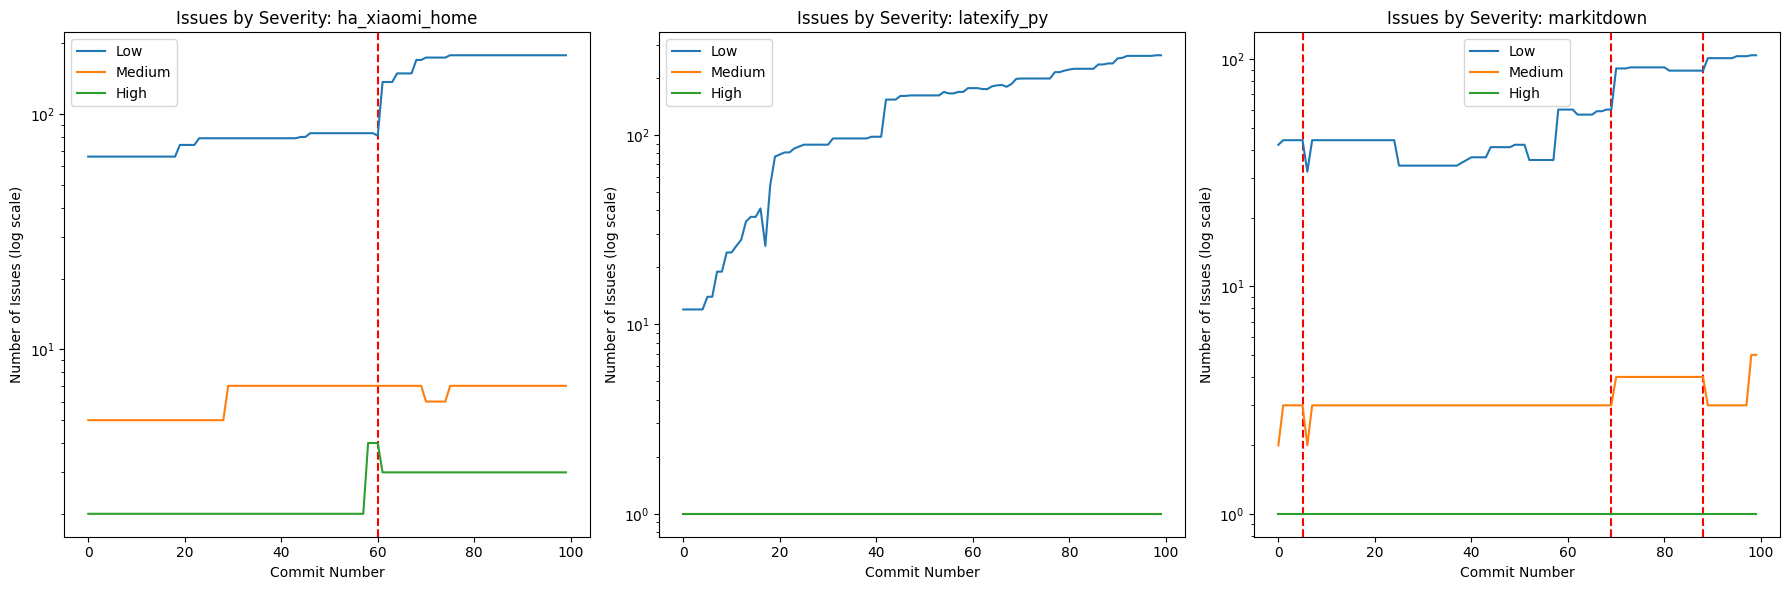

In [47]:
# RQ2
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

severity_levels = ["Low", "Medium", "High"]

for i, dir_name in enumerate(dir_names):
    if dir_name == "markitdown":
        axs[i].axvline(x=69, color='r', linestyle='--')
    if dir_name == "markitdown":
        axs[i].axvline(x=5, color='r', linestyle='--')
    if dir_name == "markitdown":
        axs[i].axvline(x=88, color='r', linestyle='--')
        
    if dir_name == 'ha_xiaomi_home':
        axs[i].axvline(x=60, color='r', linestyle='--')
    x = range(len(data[i][dir_name]))
    for severity in severity_levels:
        y = [d["issues_by_severity"][severity][0] + 1 for d in data[i][dir_name]][::-1]
        axs[i].plot(x, y, label=severity)
    axs[i].set_title(f"Issues by Severity: {dir_name}")
    axs[i].set_xlabel("Commit Number")
    axs[i].set_ylabel("Number of Issues (log scale)")
    axs[i].set_yscale('log')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [48]:
import re
import os
from tqdm import tqdm
from natsort import natsorted

# Regex patterns
pattern_dict = {
    "issue": r">> Issue: \[(.*?)\] (.*?)\n",
    "cwe": r"CWE:\s+CWE-(\d+)"
}

def parse_issues(file_path):
    issue_data = []

    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()

    issue_entries = list(re.finditer(pattern_dict["issue"], content))

    for entry in issue_entries:
        code, description = entry.groups()
        cwe_found = re.search(pattern_dict["cwe"], content[entry.end():])
        if cwe_found:
            cwe_id = cwe_found.group(1)
            issue_data.append((cwe_id, f"[{code}] {description}"))

    return issue_data

# Collect issues
all_issues = []

for folder in dir_names:
    folder_issues = []
    folder_path = os.path.join(dir_path, folder)
    file_list = natsorted(os.listdir(folder_path))

    for filename in tqdm(file_list, desc=f"Processing {folder}"):
        file_path = os.path.join(folder_path, filename)
        extracted_issues = parse_issues(file_path)
        folder_issues.append(extracted_issues)

    all_issues.append({folder: folder_issues})


Processing markitdown: 100%|██████████| 100/100 [00:00<00:00, 8371.70it/s]


In [49]:
all_issues

[{'ha_xiaomi_home': [[('703',
     '[B110:try_except_pass] Try, Except, Pass detected.'),
    ('703', '[B110:try_except_pass] Try, Except, Pass detected.'),
    ('327',
     '[B324:hashlib] Use of weak SHA1 hash for security. Consider usedforsecurity=False'),
    ('20',
     '[B506:yaml_load] Use of unsafe yaml load. Allows instantiation of arbitrary objects. Consider yaml.safe_load().'),
    ('330',
     '[B311:blacklist] Standard pseudo-random generators are not suitable for security/cryptographic purposes.'),
    ('330',
     '[B311:blacklist] Standard pseudo-random generators are not suitable for security/cryptographic purposes.'),
    ('22',
     '[B310:blacklist] Audit url open for permitted schemes. Allowing use of file:/ or custom schemes is often unexpected.'),
    ('327',
     '[B324:hashlib] Use of weak SHA1 hash for security. Consider usedforsecurity=False'),
    ('259',
     "[B105:hardcoded_password_string] Possible hardcoded password: ''"),
    ('78',
     '[B404:blackli

In [50]:
unique_issues_per_commit = []
for i, dir_name in enumerate(dir_names):
    unique_issues_per_commit.append({f"{dir_name}": []})
    for j, issue_list in enumerate(all_issues[i][dir_name]):
        unique_issues_per_commit[-1][f"{dir_name}"].append(list(set(issue_list)))



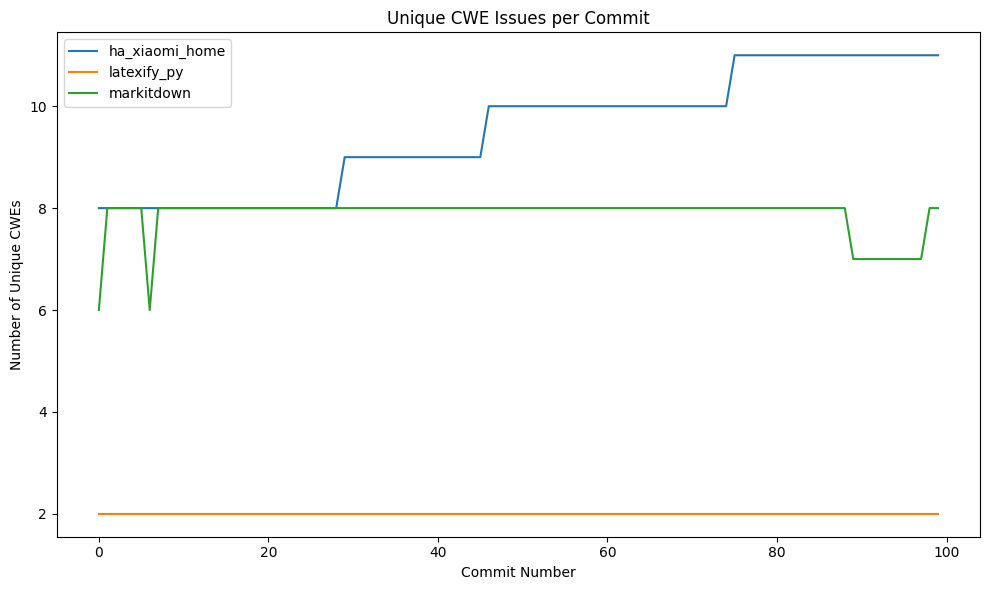

In [51]:
plt.figure(figsize=(10, 6))
for i, dir_name in enumerate(dir_names):
    x = range(len(unique_issues_per_commit[i][dir_name]))
    y = [len(d) for d in unique_issues_per_commit[i][dir_name]][::-1]
    plt.plot(x, y, label=dir_name)
    plt.title("Unique CWE Issues per Commit")
    plt.xlabel("Commit Number")
    plt.ylabel("Number of Unique CWEs")
    plt.legend()
plt.tight_layout()
plt.show()

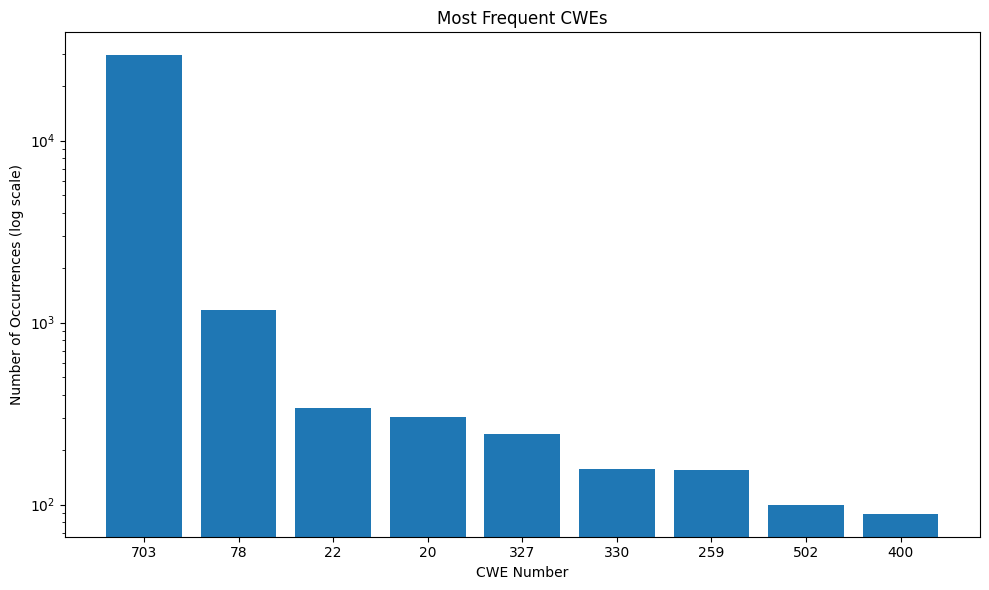

In [52]:
cwe_counts = defaultdict(int)
for i, dir_name in enumerate(dir_names):
    for issue_list in all_issues[i][dir_name]:
        for all_issue in issue_list:
            cwe_counts[all_issue[0]] += 1

sorted_cwes = sorted(cwe_counts.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
x = [cwe[0] for cwe in sorted_cwes]
y = [cwe[1] for cwe in sorted_cwes]
plt.bar(x, y)
plt.yscale('log')
plt.title("Most Frequent CWEs")
plt.xlabel("CWE Number")
plt.ylabel("Number of Occurrences (log scale)")
plt.tight_layout()
plt.show()

/var/folders/5l/drj60gkx1xg1k561061_zkx40000gn/T/ipykernel_75267/2594439570.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(x_labels, rotation=45)
/var/folders/5l/drj60gkx1xg1k561061_zkx40000gn/T/ipykernel_75267/2594439570.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(x_labels, rotation=45)
/var/folders/5l/drj60gkx1xg1k561061_zkx40000gn/T/ipykernel_75267/2594439570.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(x_labels, rotation=45)


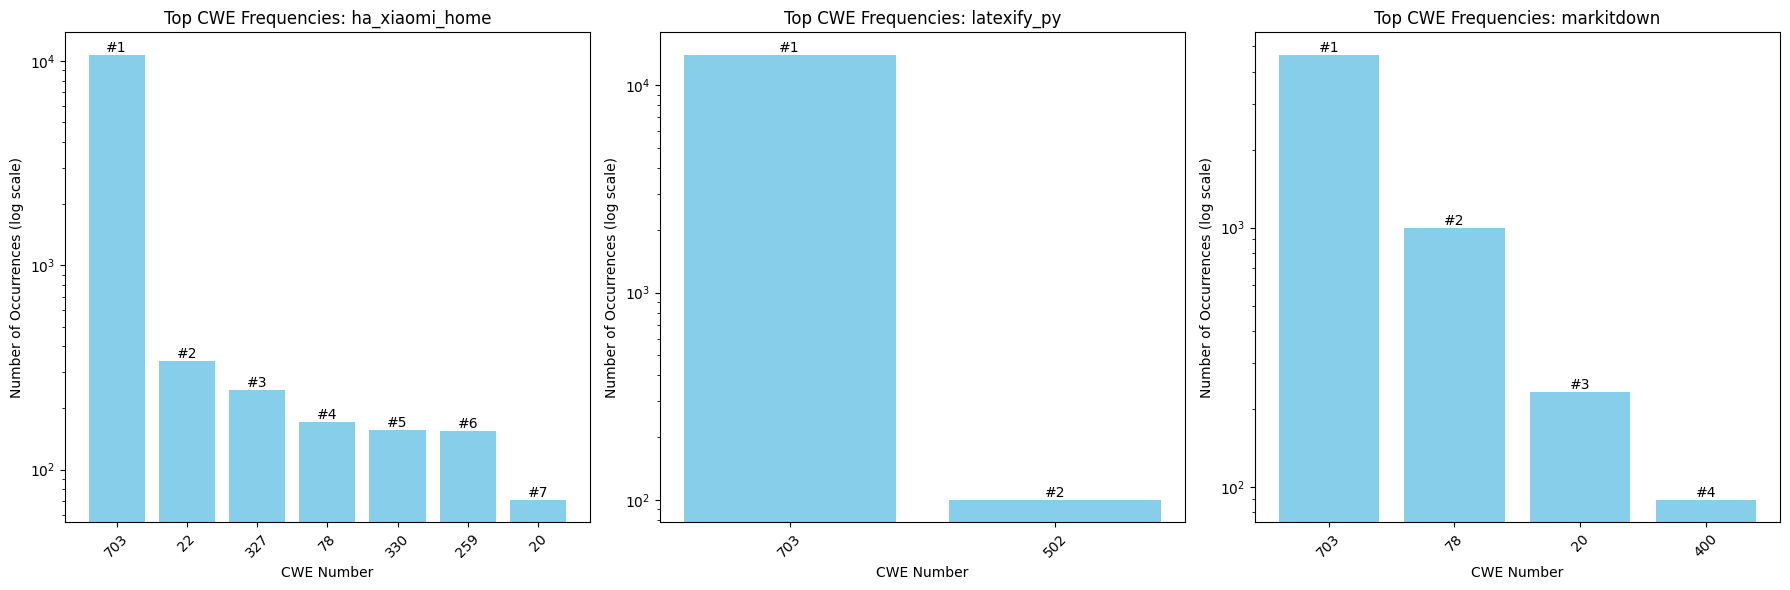

In [53]:
import matplotlib.pyplot as plt
from collections import defaultdict

fig, axs = plt.subplots(1, len(dir_names), figsize=(18, 6))

for i, dir_name in enumerate(dir_names):
    cwe_counts = defaultdict(int)

    # Count CWE occurrences
    for issue_list in all_issues[i][dir_name]:
        for issue in issue_list:
            cwe_counts[issue[0]] += 1  # issue[0] is the CWE number

    # Sort CWEs by count (descending)
    sorted_cwes = sorted(cwe_counts.items(), key=lambda x: x[1], reverse=True)

    # Get top 10 (or all if fewer)
    top_n = min(10, len(sorted_cwes))
    top_cwes = sorted_cwes[:top_n]

    x_labels = [cwe[0] for cwe in top_cwes]
    y_counts = [cwe[1] for cwe in top_cwes]

    # Bar plot
    bars = axs[i].bar(x_labels, y_counts, color='skyblue')

    # Annotate rank on each bar
    for rank, bar in enumerate(bars, start=1):
        axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                    f"#{rank}", ha='center', va='bottom', fontsize=10)

    axs[i].set_title(f"Top CWE Frequencies: {dir_name}")
    axs[i].set_xlabel("CWE Number")
    axs[i].set_ylabel("Number of Occurrences (log scale)")
    axs[i].set_yscale('log')
    axs[i].set_xticklabels(x_labels, rotation=45)

plt.tight_layout()
plt.show()
